In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/Manav Singh/Downloads/sample_sales_data.csv")

In [3]:
df.isnull().any().any()

False

In [4]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')


In [6]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


# ANALYSIS:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [8]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [34]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    g = sns.displot(data, x=column, kde=True, height=height, aspect=height/5)
    bin_edges = np.histogram(data[column].dropna(), bins='auto')[1]
    g.ax.set(title=f'Distribution of {column}' , xticks=bin_edges)
    bin_edges_rounded = np.around(bin_edges, decimals=2)
    g.ax.xaxis.set_ticklabels(bin_edges_rounded,rotation=90)  # Rotate the x-tick labels by 45 degrees


def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  plot = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect);
  plot.set_xticklabels(rotation=90)  # Rotate x tick labels vertically
  plot.set(title=f'Distribution of {column}')
  plt.show() 
def correlation_plot(data: pd.DataFrame = None):
    corr = data.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title("Correlation Plot")
    plt.show()

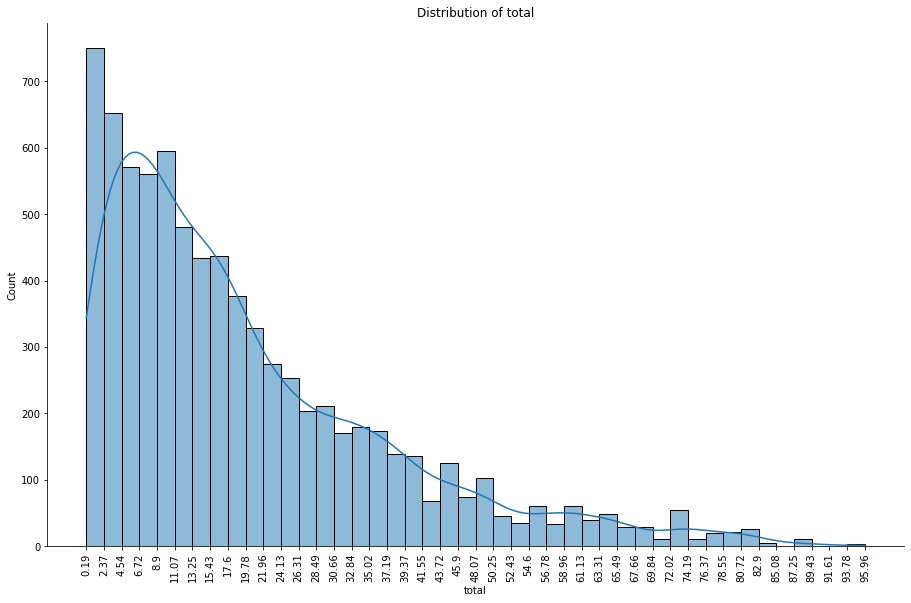

In [10]:
plot_continuous_distribution(data=df, column='total', height=8)

#### This indicates that smaller purchases are far more common than larger ,theres is and inverse correlation in no of sales and  cost of that sale

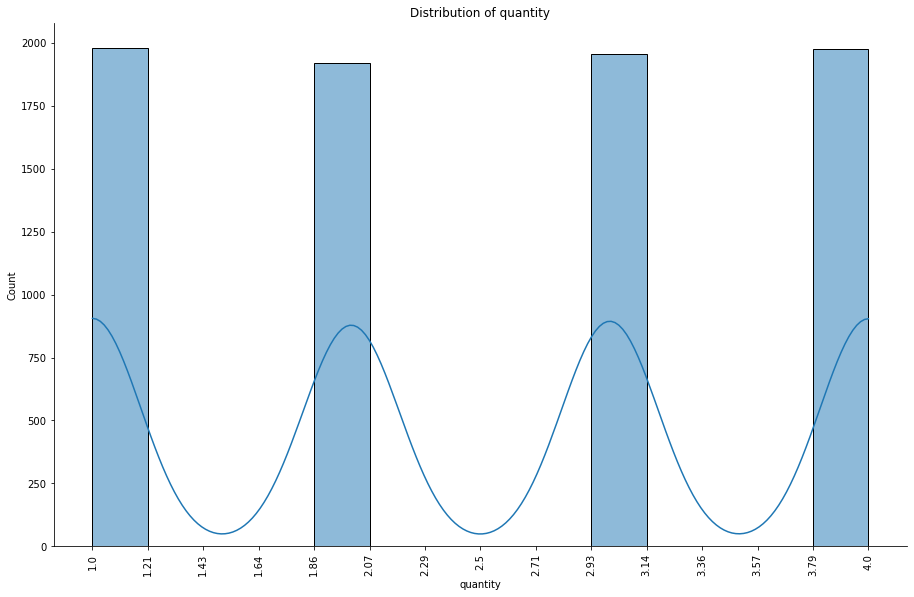

In [11]:
plot_continuous_distribution(data=df, column='quantity', height=8)

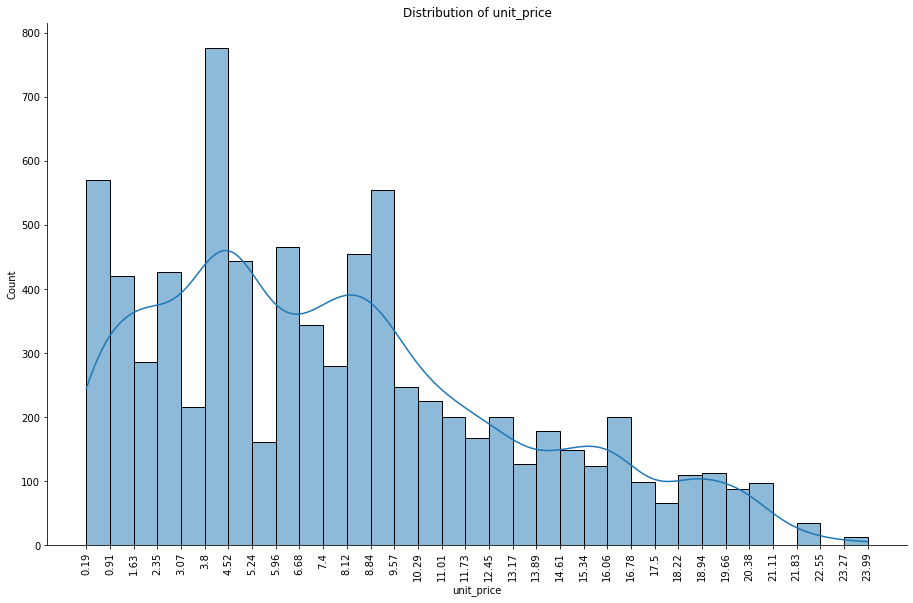

In [12]:
plot_continuous_distribution(data=df, column='unit_price', height=8)

#### Best selling items are priced at 3.8 to 4.5 per unit followed by items at 0.2 to 1 and 8.8 to 9.6

In [13]:
get_unique_values(data=df, column='transaction_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64


In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert the column to datetime if it's not already

earliest_date = df['timestamp'].min().date()
latest_date = df['timestamp'].max().date()


In [15]:
earliest_date 

datetime.date(2022, 3, 1)

In [16]:
latest_date

datetime.date(2022, 3, 7)

#### The data given covers a week of sales and  therefore 1118.4 transactions occur everyday 

In [17]:
get_unique_values(data=df, column='product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


In [18]:
count = (df['product_id'] == '3bc6c1ea-0198-46de-9ffd-514ae3338713').sum()
count

101

In [19]:
get_unique_values(data=df, column='payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


In [20]:
get_unique_values(data=df, column='customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


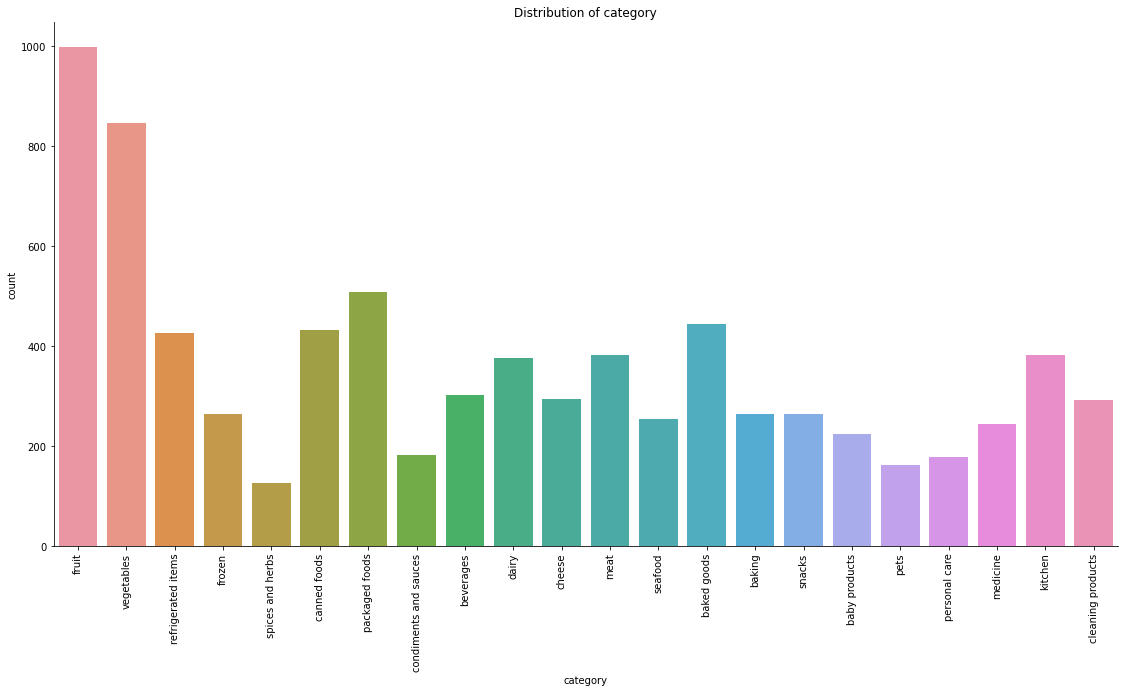

In [24]:
plot_categorical_distribution(data=df, column='category', height=8, aspect=2)

#### Most popular items are fruits,vegetables,packaged foods in that order

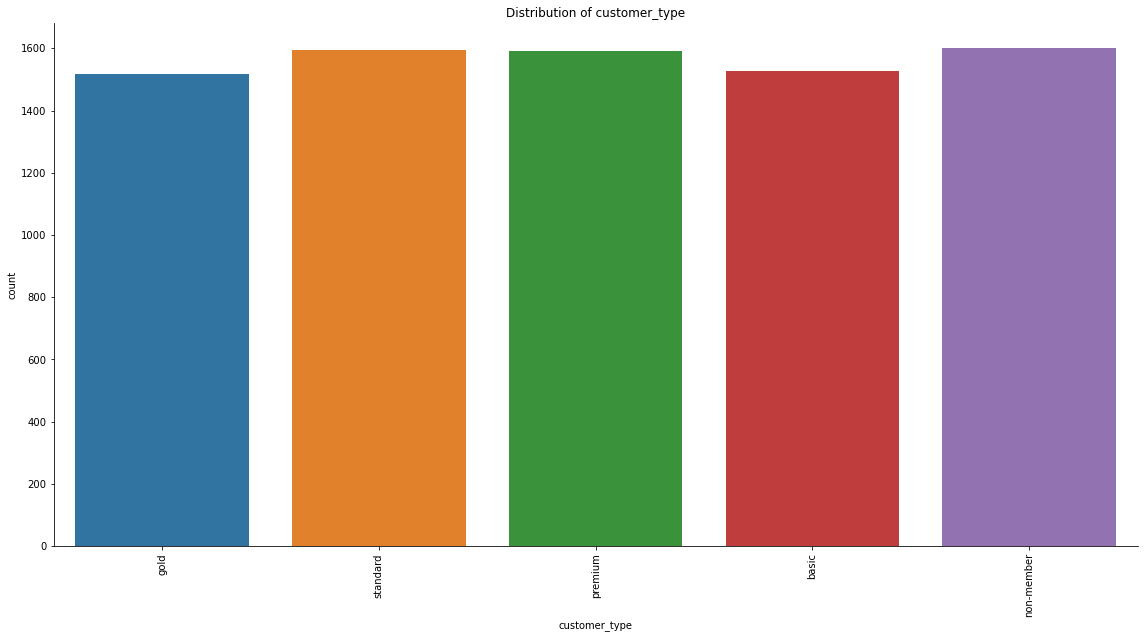

In [25]:
plot_categorical_distribution(data=df, column='customer_type', height=8, aspect=2)

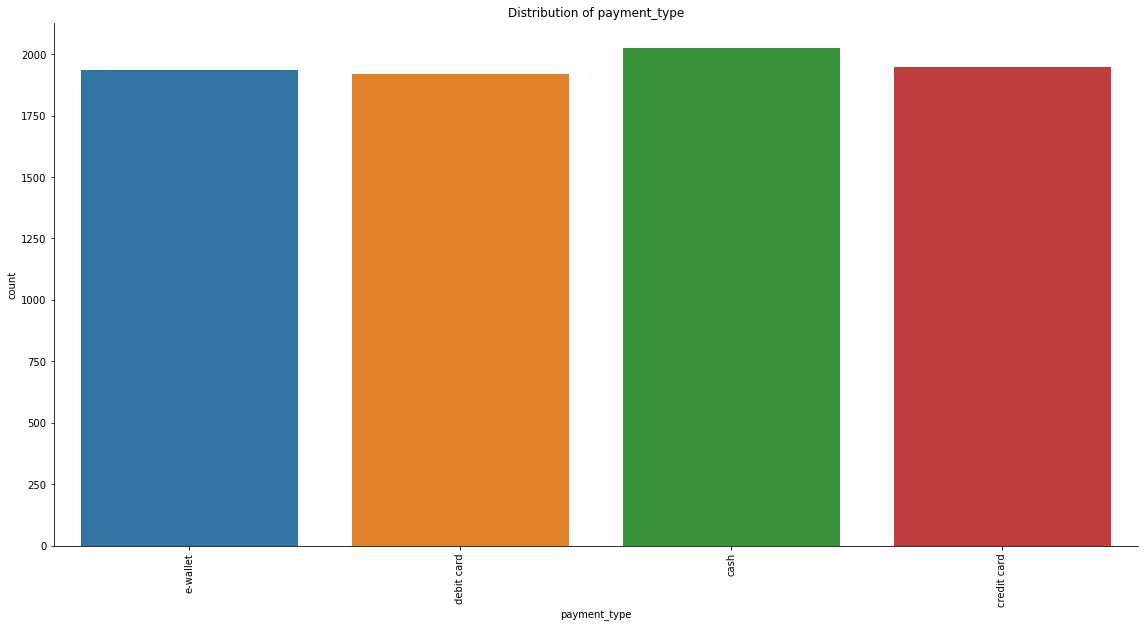

In [26]:
plot_categorical_distribution(data=df, column='payment_type', height=8, aspect=2)

#### Payment methods and customer types are more or less the evenly present in the customer base

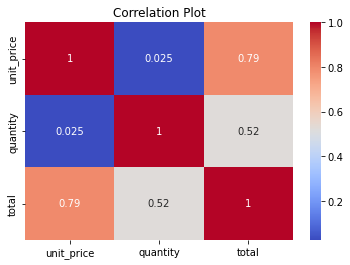

In [35]:
 correlation_plot(df)

#### unit_price and quantity are strongly positively correlated as expected  

#### From this dataset, it is impossible to answer the question 'How to better stock the items that they sell'